Demo sage-flatsurf
==================
2024-03-28 pour Oscar

flatsurf (see documentation at https://flatsurf.github.io/) is a collection of libraries for Python, Sage with some parts implemented in C++. The development is centralized on github. We illustrate in this Jupyter worksheet
- **sage-flatsurf** (documentation at https://flatsurf.github.io/sage-flatsurf/ and development page at https://github.com/flatsurf/sage-flatsurf)
- **libflatsurf** (development page at https://github.com/flatsurf/flatsurf): C++ library
- **pyflatsurf**: python interface to libflatsurf

**TODO**:
- do benchmarks for the naive saddle connection enumeration to check the $O(R^3)$ starting with the torus for both `sage-flatsurf` and `libflatsurf`

In [82]:
# this is the sage-flatsurf module which only works within SageMath
import flatsurf

In [14]:
# example of a pre-built surface
Y = flatsurf.translation_surfaces.arnoux_yoccoz(3)

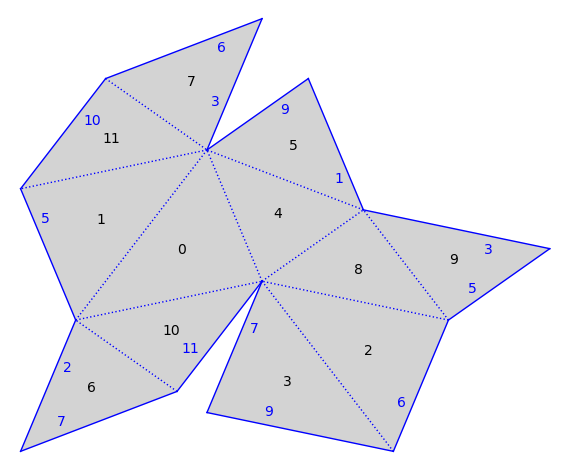

In [15]:
Y.plot()

In [17]:
# Each polygon is embedded in the plane with exact coordinates (here in a number field)
Y.polygon(0)

Polygon(vertices=[(0, 0), (-1/2*alpha^2, -1/2*alpha^2 + 1/2), (-1/2, -1/2*alpha^2 + alpha - 1/2)])

In [18]:
Y.base_ring()

Number Field in alpha with defining polynomial x^3 + x^2 + x - 1 with alpha = 0.5436890126920763?

In [20]:
Y.base_ring().polynomial().roots(CC, multiplicities=False)

[0.543689012692076,
 -0.771844506346038 - 1.11514250803994*I,
 -0.771844506346038 + 1.11514250803994*I]

The naive exploration algorithm for saddle connection enumeration has been implemented twice
- a generic version in Python (sage-flatsurf) that works for any polyhedral surface
- an optimized version in C++ (libflatsurf) that only works for translation surfaces

In [80]:
sc = Y.saddle_connections(1/7)

In [81]:
sc

[Saddle connection in direction (1, -alpha^2 + 1) with start data (4, 0) and end data (8, 2),
 Saddle connection in direction (1, alpha^2 - 1) with start data (10, 0) and end data (6, 2),
 Saddle connection in direction (1/2*alpha + 1/2, 1) with start data (10, 1) and end data (11, 1),
 Saddle connection in direction (-1/2*alpha - 1/2, 1) with start data (8, 1) and end data (9, 1),
 Saddle connection in direction (-1, alpha^2 - 1) with start data (8, 2) and end data (4, 0),
 Saddle connection in direction (-1, alpha^2 - 1) with start data (5, 0) and end data (9, 2),
 Saddle connection in direction (-1, -alpha^2 + 1) with start data (11, 0) and end data (7, 2),
 Saddle connection in direction (-1/2*alpha - 1/2, -1) with start data (11, 1) and end data (10, 1),
 Saddle connection in direction (-1, -alpha^2 + 1) with start data (6, 2) and end data (10, 0),
 Saddle connection in direction (1/2*alpha + 1/2, -1) with start data (9, 1) and end data (8, 1),
 Saddle connection in direction (1, 

A much faster version of the naive algorithm for saddle connection enumeration has been implemented in `libflatsurf`/`pyflatsurf` (https://github.com/flatsurf/flatsurf). The complexity is the same but
- the code is written in C++
- it is restricted to translation surface which prevent from doing any (useless) multiplication

The complexity is the same in `sage-flatsurf` and `libflatsurf` (expectedly $O(R^3)$) but with very different multiplicative constants.

In [26]:
from flatsurf.geometry import pyflatsurf_conversion

In [28]:
X = pyflatsurf_conversion.to_pyflatsurf(Y)

In [31]:
# the set of *all* saddle connections on X
conn = X.connections()

In [34]:
# we can iterate through
it = iter(conn)

In [54]:
%%time
l = [next(it) for _ in range(100000)]

CPU times: user 2.01 s, sys: 79.6 ms, total: 2.09 s
Wall time: 2.1 s


The iso-Delaunay is part of a development branch on github (https://github.com/flatsurf/sage-flatsurf/pull/163) by Julian Ruth and Samuel Freedman. The part about hyperbolic plotting has already been integrated in sage-flatsurf and we illustrate it below.

It is important to know that every computation is done with exact numbers and the coordinates use are the ones of the Klein model.

In [56]:
from flatsurf.geometry import hyperbolic

In [83]:
# we need to choose a base ring
H = hyperbolic.HyperbolicPlane(QQ)

In [95]:
p1 = H.point(0, 1, 'half_plane')
p2 = H.point(1, 1, 'half_plane')
p3 = H.point(1/2, 2, 'half_plane')
g12 = H.geodesic(p1, p2)
g23 = H.geodesic(p2, p3)
g31 = H.geodesic(p3, p1)
P = H.polygon([g12.left_half_space(), g23.left_half_space(), g31.left_half_space()])

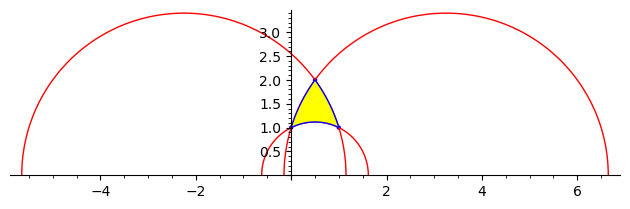

In [97]:
(p1.plot() + p2.plot() + p3.plot() + g12.plot(color='red') + g23.plot(color='red') + g31.plot(color='red') + P.plot(color='yellow'))

In [99]:
print(g12)
print(g23)
print(g31)

{(x^2 + y^2) - x - 1 = 0}
{-2*(x^2 + y^2) - 9*x + 13 = 0}
{-2*(x^2 + y^2) + 13*x + 2 = 0}


In [100]:
print(P)

{(x^2 + y^2) - x - 1 ≥ 0} ∩ {2*(x^2 + y^2) + 9*x - 13 ≤ 0} ∩ {2*(x^2 + y^2) - 13*x - 2 ≤ 0}
